In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r"C:\Users\iamsh\OneDrive\Desktop\mypythonclass\Dataset\IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(['sepal_length', 'sepal_width'], axis = 1)

In [5]:
df.head()

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


Text(0, 0.5, 'petal_width')

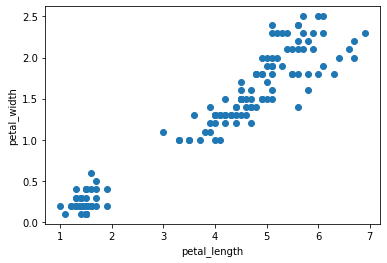

In [6]:
plt.scatter(df.petal_length, df.petal_width)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [7]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(df[['petal_length', 'petal_width']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
df['cluster'] = y_pred
df.head()

,petal_length,petal_width,species,cluster
0,1.4,0.2,Iris-setosa,0
1,1.4,0.2,Iris-setosa,0
2,1.3,0.2,Iris-setosa,0
3,1.5,0.2,Iris-setosa,0
4,1.4,0.2,Iris-setosa,0


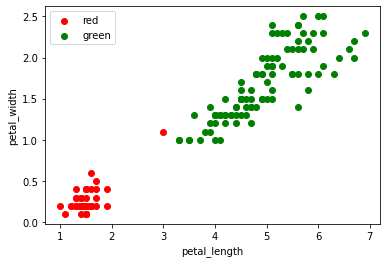

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.petal_length, df1.petal_width, c = 'red', label = 'red')
plt.scatter(df2.petal_length, df2.petal_width, c = 'green', label = 'green')

plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.legend()

In [10]:
wcss = []

kmeans = range(1,11)

for i in kmeans:
    km = KMeans(n_clusters=i)
    km.fit(df[['petal_length', 'petal_width']])
    wcss.append(km.inertia_)

C:\Users\iamsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
wcss

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 19.499400899685114,
 13.93330875790876,
 11.056639971910453,
 9.225957208237988,
 7.771725396825398,
 6.572886291486289,
 5.642977920772037]

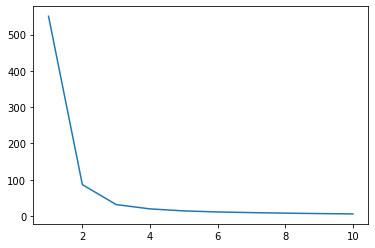

In [12]:
plt.plot(kmeans, wcss)

In [13]:
km = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_pred = km.fit_predict(df[['petal_length', 'petal_width']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
df['cluster'] = y_pred

In [15]:
df.head()

,petal_length,petal_width,species,cluster
0,1.4,0.2,Iris-setosa,0
1,1.4,0.2,Iris-setosa,0
2,1.3,0.2,Iris-setosa,0
3,1.5,0.2,Iris-setosa,0
4,1.4,0.2,Iris-setosa,0


In [16]:
km.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

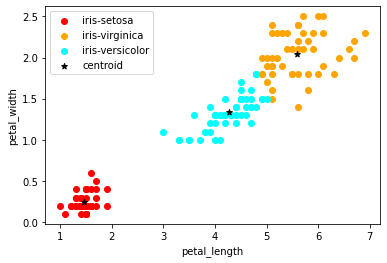

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.scatter(df1.petal_length, df1.petal_width, c = 'red', label = 'iris-setosa')
plt.scatter(df2.petal_length, df2.petal_width, c = 'orange', label = 'iris-virginica')
plt.scatter(df3.petal_length, df3.petal_width, c = 'cyan', label = 'iris-versicolor')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '*', label = 'centroid')


plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.legend()